# In python, variables are pointers
except basic types like `int`, `float`, `bool`

In [3]:
x = [1, 2, 3]
y = x
x.append(4)
print(x, y)

[1, 2, 3, 4] [1, 2, 3, 4]


# pytorch as a tensor library
like numpy

In [4]:
import torch

In [110]:
x = torch.tensor([1.0, 2.0, 3.0])
y = torch.tensor([3.0, 4.0, 5.0])

z = x * y + y
print(z)

tensor([ 6., 12., 20.])


In [111]:
x = torch.tensor([1.0, 2.0, 3.0])
y = torch.tensor([3.0, 4.0, 5.0])
x.add_(y.mul_(x))

print(x)
print(y)

tensor([ 4., 10., 18.])
tensor([ 3.,  8., 15.])


In [13]:
x = torch.tensor([[2.0, 3.0], [0.0, 1.0]])
print(x)
print(x.size())
print(x.flatten())

tensor([[2., 3.],
        [0., 1.]])
torch.Size([2, 2])
tensor([2., 3., 0., 1.])


In [18]:
x = torch.tensor([[2.0, 3.0], [0.0, 1.0]])
y = torch.randn(2, 3)
print(x @ y)

tensor([[ 2.2069, -6.5537,  3.7982],
        [ 0.3199, -1.5850,  1.1190]])


In [30]:
# creation
x = torch.tensor([1, 2, 3], dtype=torch.float64, device='cpu')
y = torch.ones(3, 3, dtype=torch.float64, device='cpu')

w = torch.ones_like(x)  # torch.zeros_like, torch.empty_like, torch.randn_like, ...
print(w)

z = x.new_ones(4, 5)  # x.new_empty(4), x.new_full((2, 3), 42)
print(z)

tensor([1., 1., 1.], dtype=torch.float64)
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], dtype=torch.float64)


In [37]:
# indexing
x = torch.arange(10, dtype=torch.float64)
print(x)

print(x[3])

print(x[3:5])

print(x[[0, 3, 5, 6]])

print(x[::2])

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=torch.float64)
tensor(3., dtype=torch.float64)
tensor([3., 4.], dtype=torch.float64)
tensor([0., 3., 5., 6.], dtype=torch.float64)
tensor([0., 2., 4., 6., 8.], dtype=torch.float64)


In [136]:
# indexing by mask
x = torch.arange(10)
print(x)

m = torch.tensor([0, 1, 0, 0, 0, 0, 1, 0, 1, 1], dtype=torch.uint8)
print(x[m])

m = (x % 3 == 1)
print(x[m])

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([1, 6, 8, 9])
tensor([1, 4, 7])


In [80]:
# reshape
x = torch.arange(12, dtype=torch.float32)
print(x)

x = x.view(3, 4)
print(x)

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])


In [83]:
# reduction
x = torch.arange(12, dtype=torch.float32).view(3, 4)
print(x)

print(x.sum(0))
print(x.sum(1))

# x.mean, x.min, x.max, x.prod

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])
tensor([12., 15., 18., 21.])
tensor([ 6., 22., 38.])


# The power of pytoch: torch.autograd

In [42]:
x = torch.tensor(2.5, requires_grad=True)
y = 0.5 * x ** 2

torch.autograd.grad(y, x)

(tensor(2.5000),)

In [46]:
x = torch.tensor(2.0, requires_grad=True)
a = torch.tensor([1.0, 0.0, 0.0], requires_grad=True)
y = x * a[0] + x ** 2 * a[1]

torch.autograd.grad(y, [x, a])

(tensor(1.), tensor([2., 4., 0.]))

In [54]:
x = torch.tensor(2.5, requires_grad=True)
print(x.grad)

y = 0.5 * x ** 2
torch.autograd.backward(y)
print(x.grad)

y = x + 42
torch.autograd.backward(y)
print(x.grad)

x.grad = None
y = x ** 2
torch.autograd.backward(y)
print(x.grad)

None
tensor(2.5000)
tensor(3.5000)
tensor(5.)


In [115]:
x = torch.tensor(2.5, requires_grad=True)
y = torch.tensor(2.5, requires_grad=True)

with torch.no_grad():
    x.add_(y)

z = x + y

torch.autograd.grad(z, [x, y])

(tensor(1.), tensor(1.))

In [65]:
# higher order derivatives

x = torch.tensor(2.5, requires_grad=True)
y = x ** 2

z, = torch.autograd.grad(y, x, create_graph=True)
print(z)

w, = torch.autograd.grad(z, x)
print(w)

tensor(5., grad_fn=<MulBackward0>)
tensor(2.)


# Load MNIST

In [66]:
import torchvision

In [68]:
dataset = torchvision.datasets.MNIST('some_directory', train=True, download=True)

Processing...
Done!


(<PIL.Image.Image image mode=L size=28x28 at 0x7F3B6C6FCEF0>, tensor(5))

In [69]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F3B6C73F7F0>, tensor(5))

tensor(2)


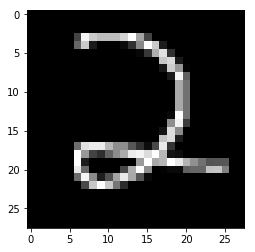

In [77]:
x, y = dataset[1034]

print(y)

import matplotlib.pyplot as plt
plt.imshow(x)

In [117]:
transform = torchvision.transforms.ToTensor()
dataset = torchvision.datasets.MNIST('some_directory', train=True, download=True, transform=transform)

x_tr = torch.stack([x for x, y in dataset])
y_tr = torch.stack([y for x, y in dataset])

In [118]:
x_tr = x_tr.view(-1, 28 * 28)
x_tr = (x_tr - x_tr.mean(0)) / x_tr.std()

# Perceptron 1
using only tensors and autograd

In [175]:
t_tr = (y_tr % 2).type(x_tr.dtype) * 2 - 1

w = torch.randn(28 * 28, requires_grad=True)

for step in range(1000):

    out = x_tr @ w / 28
    
    loss = (out - t_tr).pow(2).mean()

    if step % 100 == 0:
        print(loss.item())

    w.grad = None
    loss.backward()
    
    with torch.no_grad():
        w.add_(-w.grad)

1.9009095430374146
0.5425315499305725
0.48952051997184753
0.46721360087394714
0.4535720646381378
0.4440196752548218
0.43685463070869446
0.43124091625213623
0.4267041087150574
0.42294973134994507


In [178]:
((x_tr @ w) * t_tr <= 0).double().mean()

tensor(0.1211, dtype=torch.float64)

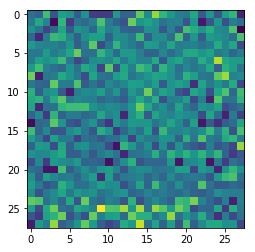

In [176]:
plt.imshow(w.view(28, 28).detach().numpy())

### stochastic gradient descent

In [179]:
t_tr = (y_tr % 2).type(x_tr.dtype) * 2 - 1

w = torch.randn(28 * 28, requires_grad=True)

for step in range(20000):
    
    batch_index = torch.randperm(len(x_tr))[:128]
    x_batch = x_tr[batch_index]
    t_batch = t_tr[batch_index]

    out = x_batch @ w / 28
    
    loss = (out - t_batch).pow(2).mean()

    if step % 1000 == 0:
        print(loss.item())

    w.grad = None
    loss.backward()
    
    with torch.no_grad():
        w.add_(-0.1 * w.grad)

2.1037676334381104
0.4646906554698944
0.4586796760559082
0.42235067486763
0.4571816921234131
0.42195141315460205
0.36143365502357483
0.5417263507843018
0.5048329830169678
0.4209337532520294
0.3177398443222046
0.45530110597610474
0.47970297932624817
0.4553396701812744
0.36397016048431396
0.43181294202804565
0.40211722254753113
0.3843066692352295
0.3518679738044739
0.3483385145664215


In [181]:
((x_tr @ w) * t_tr <= 0).double().mean()

tensor(0.1137, dtype=torch.float64)

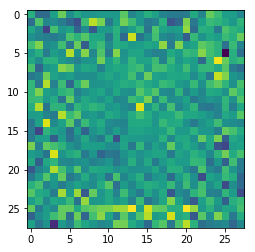

In [182]:
plt.imshow(w.view(28, 28).detach().numpy())

# Perceptron 2
using `torch.optim`

In [183]:
t_tr = (y_tr % 2).type(x_tr.dtype) * 2 - 1

w = torch.randn(28 * 28, requires_grad=True)

optim = torch.optim.Adam([w])

for step in range(20000):
    
    batch_index = torch.randperm(len(x_tr))[:128]

    x_batch = x_tr[batch_index]
    t_batch = t_tr[batch_index]

    out = x_batch @ w / 28
    
    loss = (out - t_batch).pow(2).mean()

    if step % 1000 == 0:
        print(loss.item())

    optim.zero_grad()
    loss.backward()
    optim.step()

1.6961007118225098
0.561443567276001
0.488383948802948
0.39407968521118164
0.44064751267433167
0.37673211097717285
0.39091089367866516
0.36805883049964905
0.387919545173645
0.44890648126602173
0.2922641336917877
0.36027786135673523
0.4058082103729248
0.3936494290828705
0.3668864965438843
0.32366520166397095
0.4838399589061737
0.35324788093566895
0.3053494989871979
0.410905122756958


In [185]:
((x_tr @ w) * t_tr <= 0).double().mean()

tensor(0.1067, dtype=torch.float64)

# Perceptron 3
using `nn.Module`

In [186]:
import torch.nn as nn

In [189]:
t_tr = (y_tr % 2).type(x_tr.dtype) * 2 - 1

perceptron = nn.Linear(28 * 28, 1)

optim = torch.optim.Adam(perceptron.parameters())

for step in range(20000):
    
    batch_index = torch.randperm(len(x_tr))[:128]

    x_batch = x_tr[batch_index]
    t_batch = t_tr[batch_index]

    out = perceptron(x_batch).view(-1)
    
    loss = (out - t_batch).pow(2).mean()

    if step % 1000 == 0:
        print(loss.item())

    optim.zero_grad()
    loss.backward()
    optim.step()

1.129401445388794
0.40635886788368225
0.41054707765579224
0.4098632335662842
0.4626077711582184
0.3301481008529663
0.4665408432483673
0.40949946641921997
0.36613601446151733
0.39002078771591187
0.4370722770690918
0.3923724591732025
0.3146885633468628
0.377149373292923
0.3350764811038971
0.38348695635795593
0.35853344202041626
0.44187095761299133
0.4869236946105957
0.42585423588752747


In [190]:
((x_tr @ w) * t_tr <= 0).double().mean()

tensor(0.1067, dtype=torch.float64)